https://github.com/EmilianoLopez31/Day1

https://github.com/SpiderPork28/Analitica

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('Pokemon.csv')

In [ ]:
#df.head()
df.info()
#print(df.describe())

<ipython-input-14-4b60ec30b8a6>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col].dropna() for col in cols_1], labels=cols_1, showfliers=False)


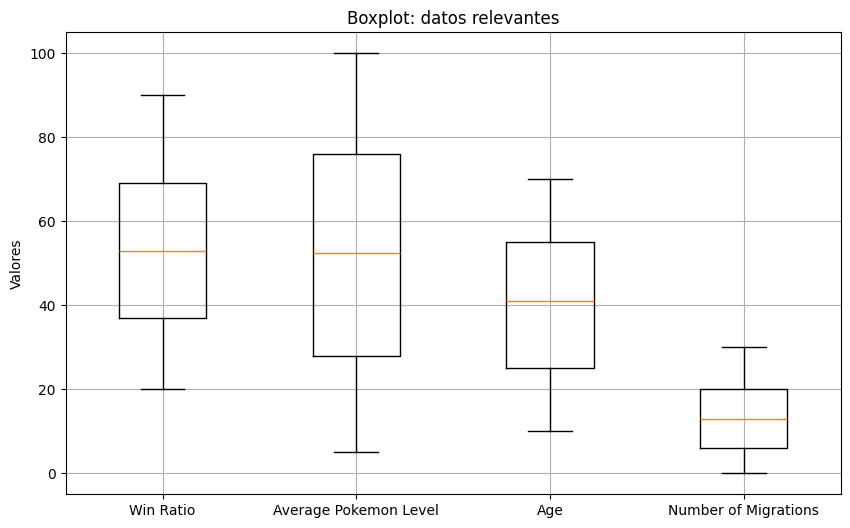

In [ ]:
# box plot
#,'Debt to Kanto','Criminal Record','Number of Gym Badges'

cols_1 = ['Win Ratio', 'Average Pokemon Level','Age','Number of Migrations']

plt.figure(figsize=(10, 6))
plt.boxplot([df[col].dropna() for col in cols_1], labels=cols_1, showfliers=False)
plt.title("Boxplot: datos relevantes")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

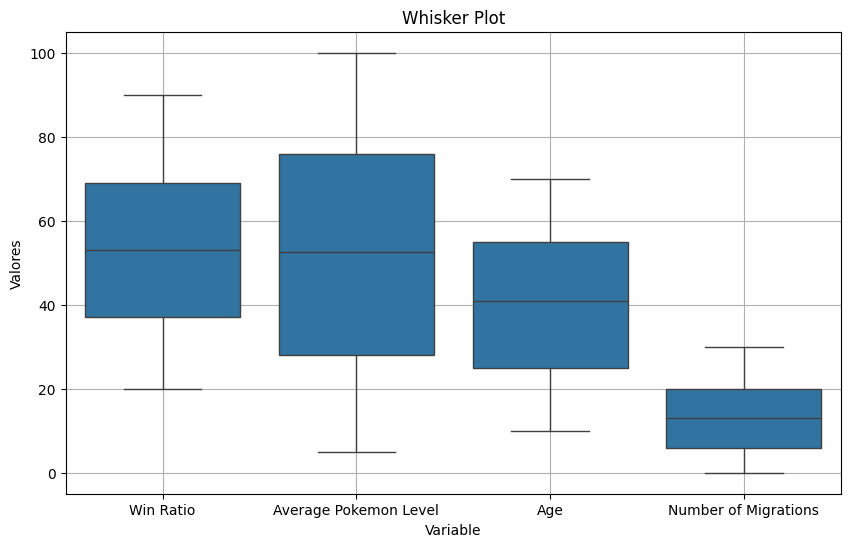

In [ ]:
# whisker plots
df_melt = df[['Win Ratio', 'Average Pokemon Level','Age','Number of Migrations']].melt(var_name='Variable', value_name='Valor')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Valor', data=df_melt)

plt.title("Whisker Plot")
plt.ylabel("Valores")
plt.grid(True)
plt.show()


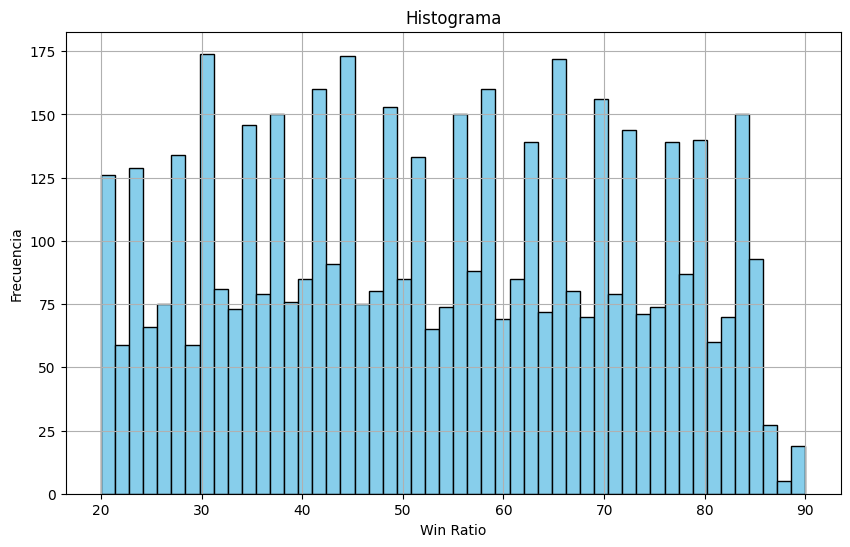

In [ ]:
# histograms
plt.figure(figsize=(10, 6))
plt.hist(df['Win Ratio'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title("Histograma")
plt.xlabel("Win Ratio")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

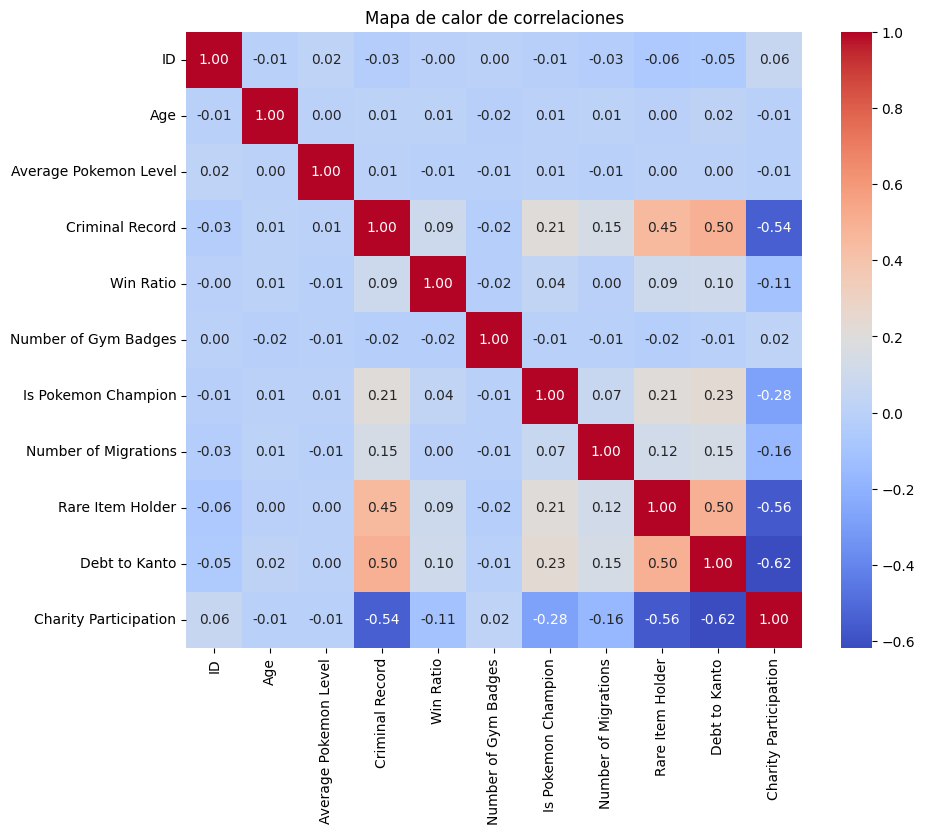

In [ ]:
# heat maps
# Calcular la matriz de correlación de las columnas numéricas
corr_matrix = df.corr(numeric_only=True)

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Mapa de calor de correlaciones")
plt.show()

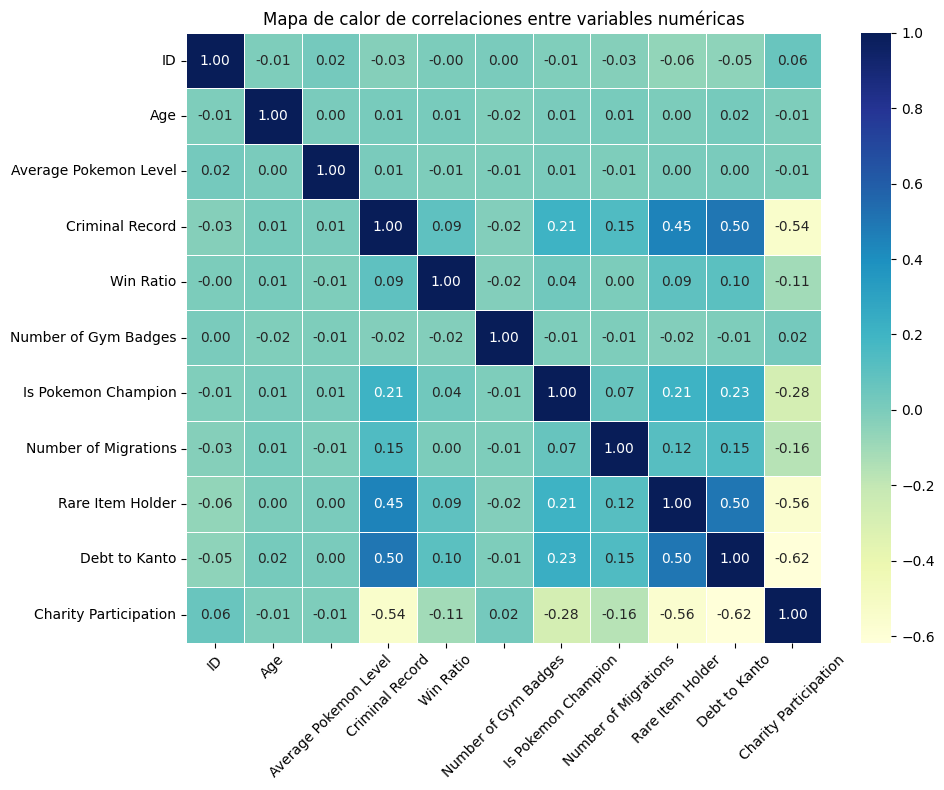

In [ ]:
# Calcula la matriz de correlación solo con columnas numéricas
correlaciones = df.corr(numeric_only=True)

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)

plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-20-b0c800e80bab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Most Used Pokemon Type', y='Win Ratio', data=df, palette='Set3')


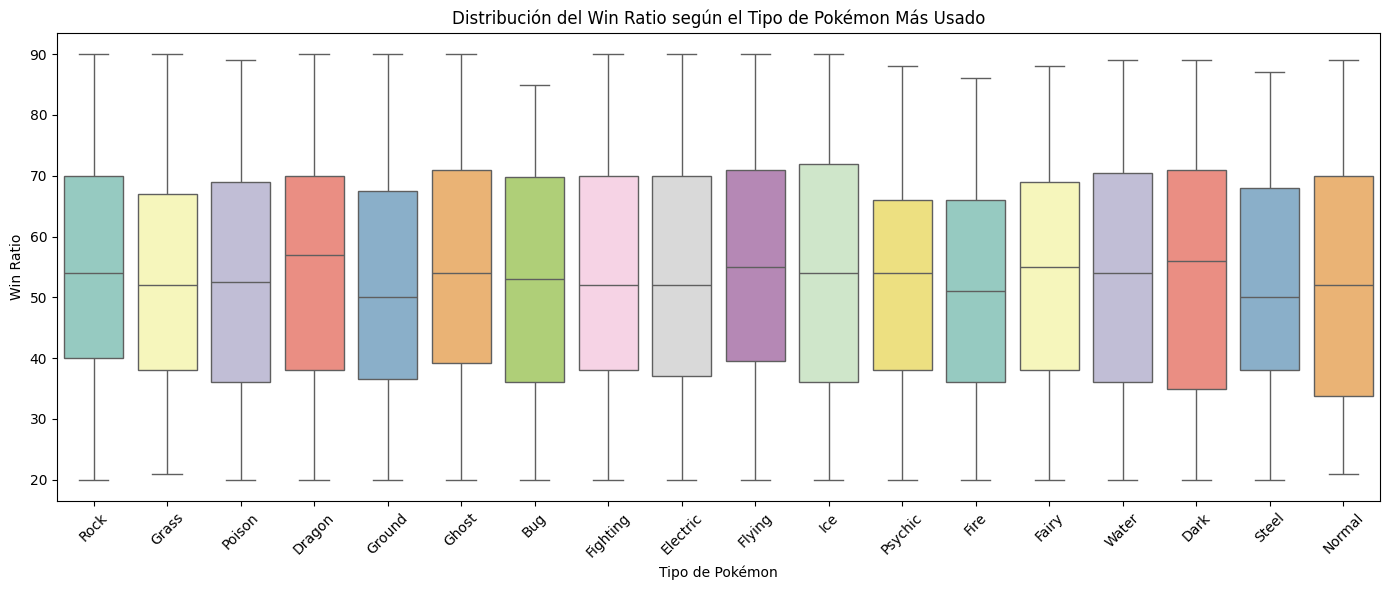

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Most Used Pokemon Type', y='Win Ratio', data=df, palette='Set3')

plt.title("Distribución del Win Ratio según el Tipo de Pokémon Más Usado")
plt.xlabel("Tipo de Pokémon")
plt.ylabel("Win Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




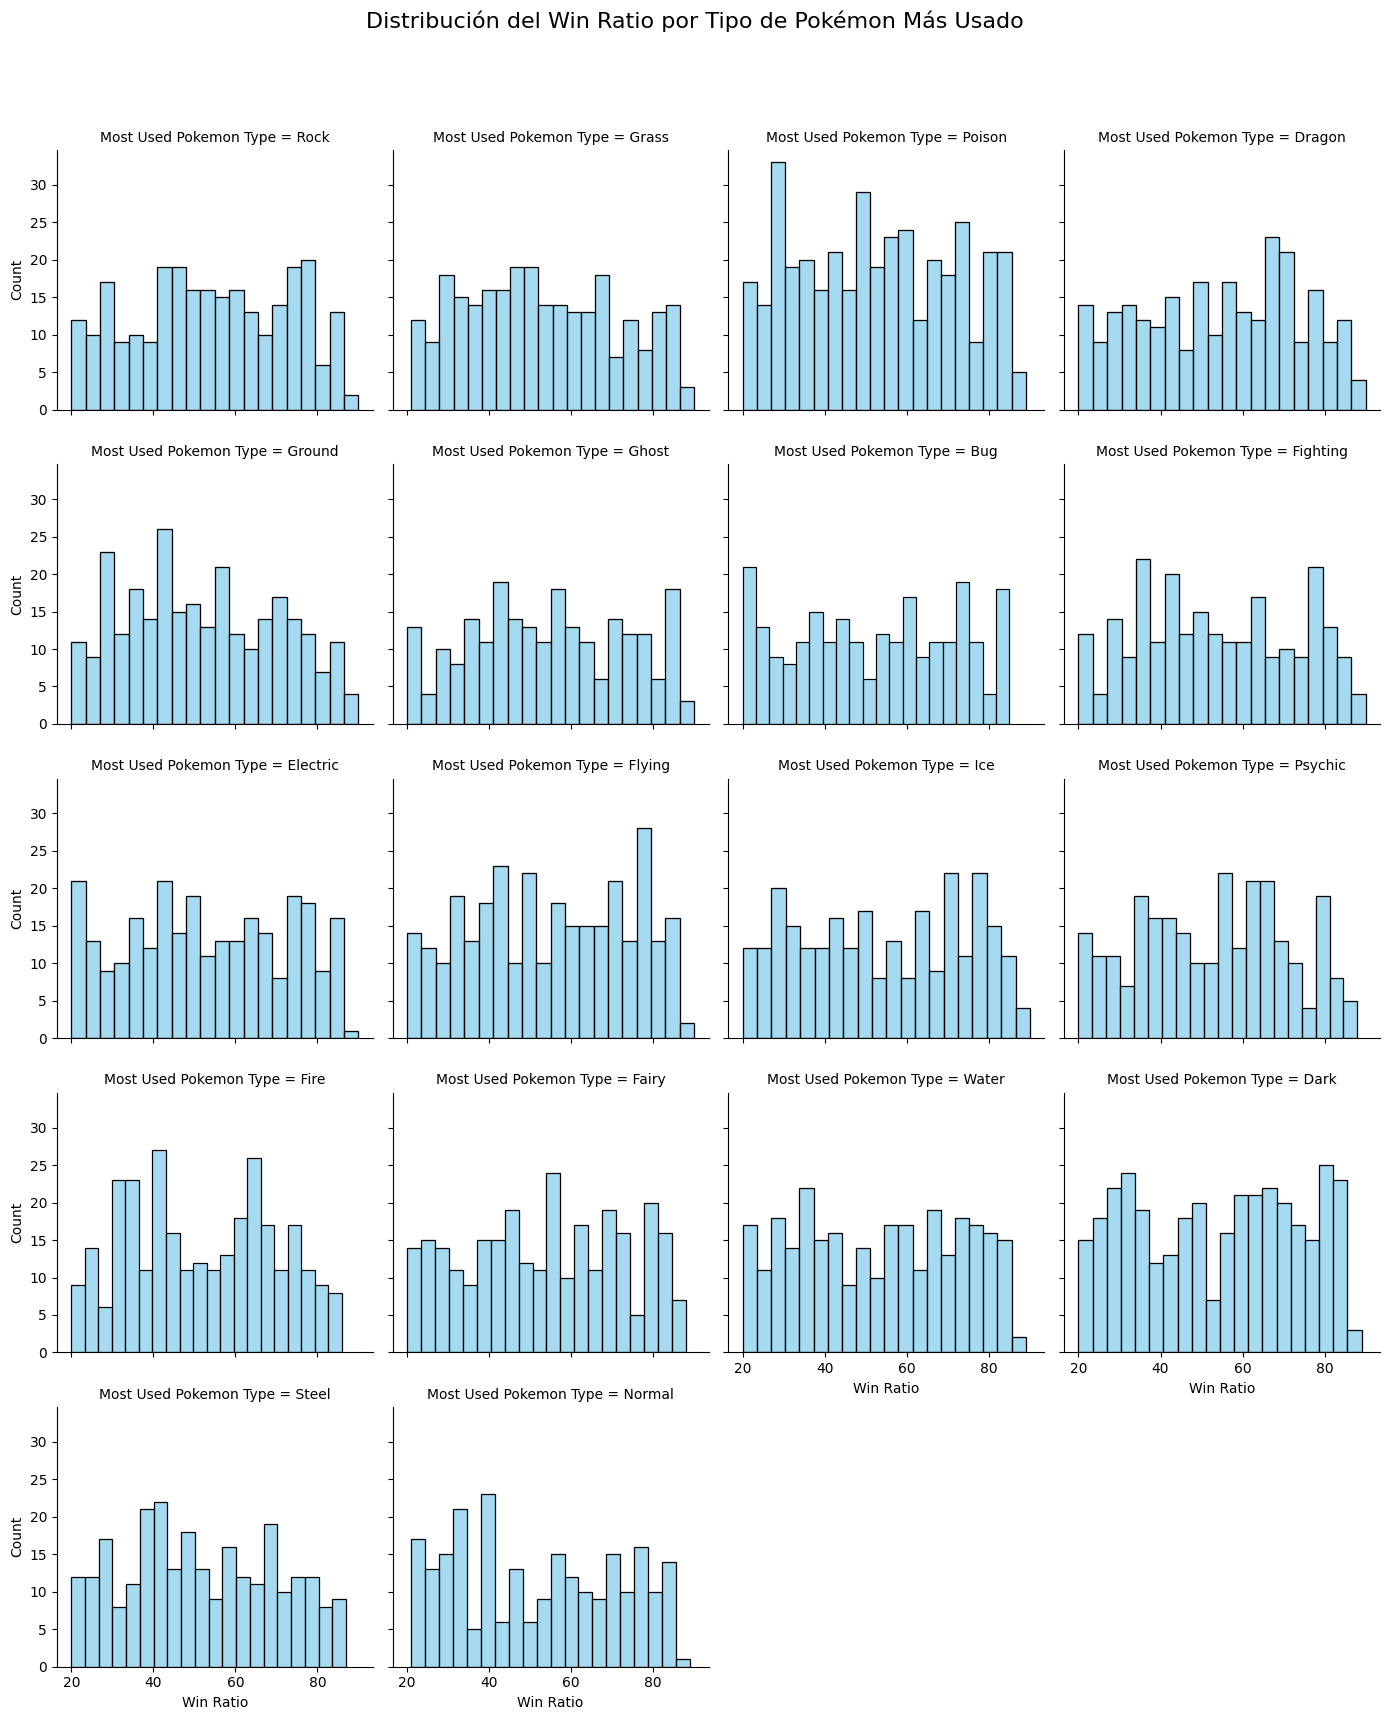

In [ ]:
g = sns.FacetGrid(df, col='Most Used Pokemon Type', col_wrap=4, height=3.5, sharex=True, sharey=True)

g.map_dataframe(sns.histplot, x='Win Ratio', bins=20, color='skyblue')

g.fig.suptitle("Distribución del Win Ratio por Tipo de Pokémon Más Usado", fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)
plt.show()



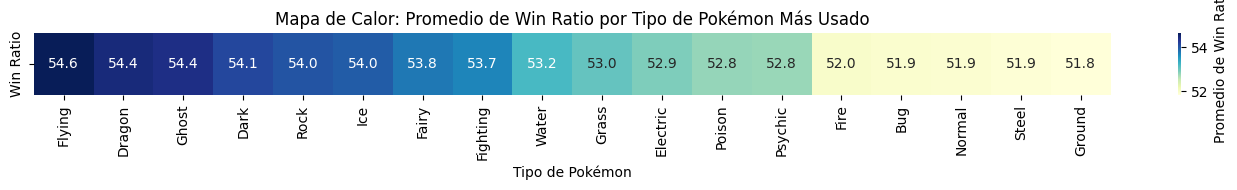

In [ ]:
heatmap_data = df.groupby('Most Used Pokemon Type')['Win Ratio'].mean().sort_values(ascending=False)

heatmap_df = pd.DataFrame(heatmap_data).T

plt.figure(figsize=(14, 2))
sns.heatmap(heatmap_df, annot=True, cmap='YlGnBu', fmt=".1f", cbar_kws={'label': 'Promedio de Win Ratio'})

plt.title("Mapa de Calor: Promedio de Win Ratio por Tipo de Pokémon Más Usado")
plt.xlabel("Tipo de Pokémon")
plt.ylabel("")
plt.tight_layout()
plt.show()


**En este punto tuvimos que replantearnos e usar otra fuente de datos para comparar pokemons legendarios y los comunes estos son nuestros resultados**

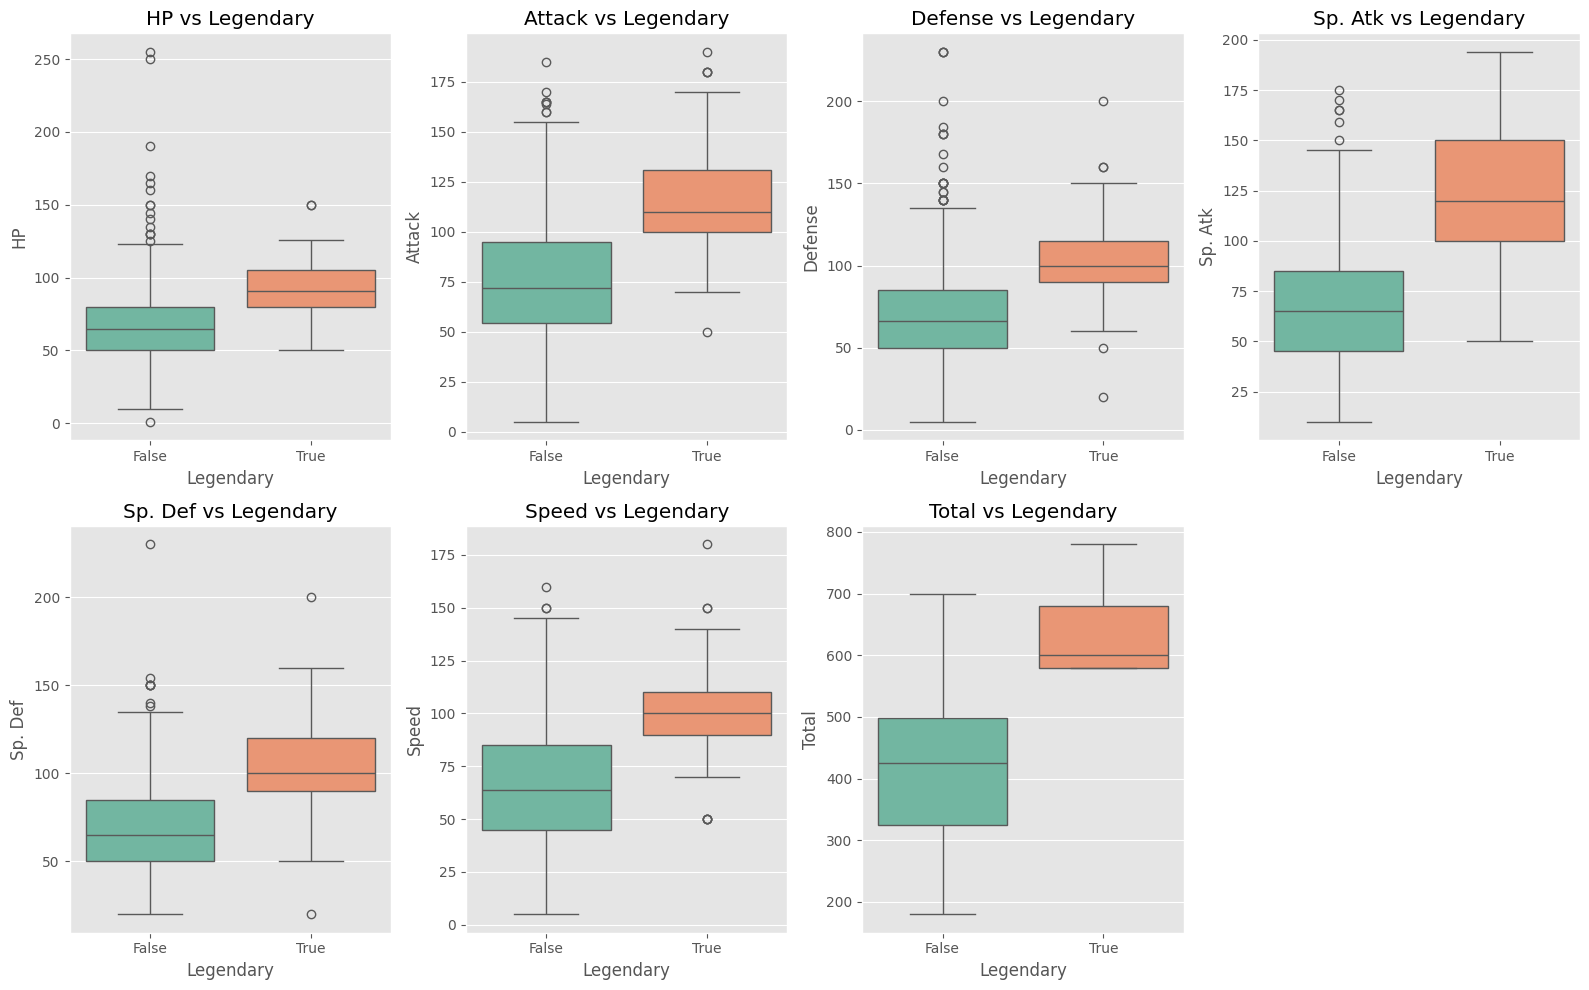

In [14]:
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']
df_legend = df[stats_cols + ['Legendary']]

plt.figure(figsize=(16, 10))
for i, col in enumerate(stats_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=df_legend, x='Legendary', y=col, hue='Legendary', legend=False, palette='Set2')
    plt.title(f'{col} vs Legendary')
plt.tight_layout()
plt.show()


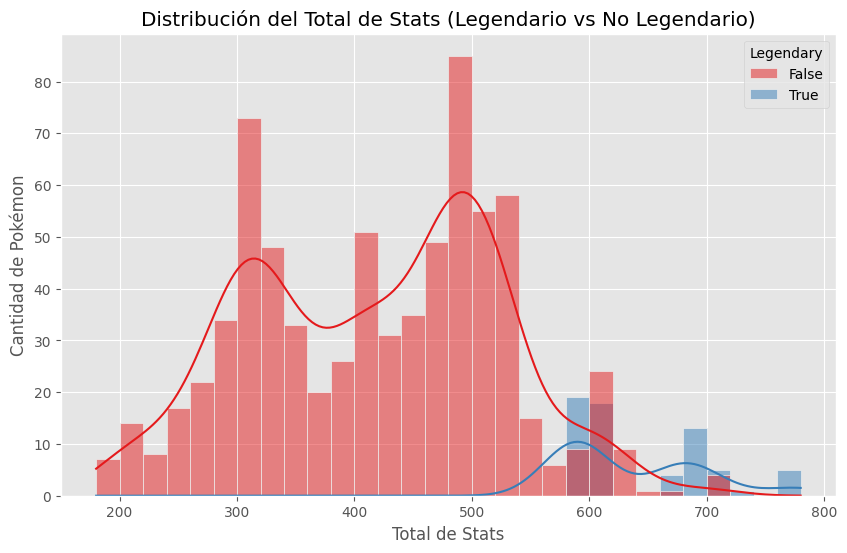

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Total', hue='Legendary', bins=30, kde=True, palette='Set1')
plt.title('Distribución del Total de Stats (Legendario vs No Legendario)')
plt.xlabel('Total de Stats')
plt.ylabel('Cantidad de Pokémon')
plt.show()


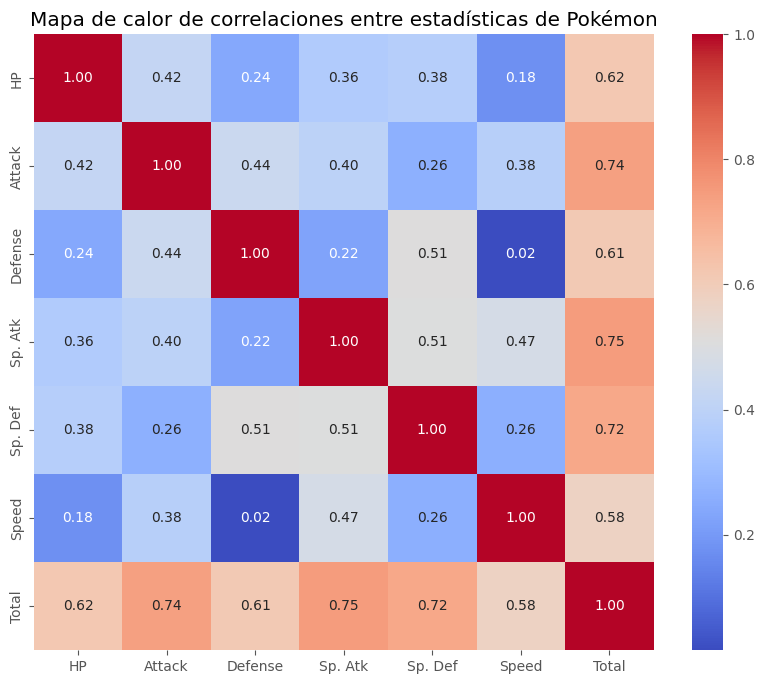

In [16]:
corr = df[stats_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones entre estadísticas de Pokémon')
plt.show()